<a href="https://colab.research.google.com/github/razvanpetru1/ML_COMP4139_Assignment2/blob/main/Regression_task_assigment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import os
import shutil
from subprocess import call

# Define the folder and repository
repo_path = '/content/ML_COMP4139_Assignment2'
repo_url = 'https://github.com/razvanpetru1/ML_COMP4139_Assignment2.git'

# Remove the default sample_data folder if it exists
sample_data_path = '/content/sample_data'
if os.path.exists(sample_data_path):
    shutil.rmtree(sample_data_path)

# Check if the repo folder already exists
if os.path.exists(repo_path):
    print(f"The repository folder '{repo_path}' already exists. Pulling latest changes...")
    os.chdir(repo_path)  # Navigate into the repository folder
    call(['git', 'pull'])  # Pull the latest changes
else:
    print(f"The repository folder '{repo_path}' does not exist. Cloning the repository...")
    call(['git', 'clone', repo_url, repo_path])  # Clone the repository

print("Done!")


The repository folder '/content/ML_COMP4139_Assignment2' already exists. Pulling latest changes...
Done!


# Dataset entry

Input:
 - Original DataBase file \

Output:
 - X_raw - Raw features values,
 - Y_raw - Raw labes values,
 - regresion_task_selected_data.csv ( file that contains relevant datapoints for solving reggresion task)


Description for this section:  We want to select the relevant datapoint from original provided file, we create our own DataBase and select the features and lables for solving the regression problem. Also, we check for null values and for '999' - missing values.


Load dataset \


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [55]:

# Read path for the sample_data folder in Colab

file_path = '/content/ML_COMP4139_Assignment2/TrainDataset2024.xls'

try:
  df = pd.read_excel(file_path, index_col=False) # using pandas to read in csv file into a dataframe (df)
  # print(df.head())  # Print the first few rows to inspect the data
  print(f'File was found at {file_path}')
except FileNotFoundError:
  print(f"File not found at: {file_path}")

df.head() # displays first 5 rows of the dataframe

File was found at /content/ML_COMP4139_Assignment2/TrainDataset2024.xls


,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [56]:
'''Drop the ID column'''
df = df.drop('ID', axis = 1)
display(df.head())

''' Obtain a quick description of the data'''
df.info()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.0,41.0,0,0,0,1,3,3,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,142.0,39.0,1,1,0,0,3,3,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,135.0,31.0,0,0,0,1,2,1,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,12.0,35.0,0,0,0,1,3,3,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,109.0,61.0,1,0,0,0,2,1,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 120 entries, pCR (outcome) to original_ngtdm_Strength
dtypes: float64(108), int64(12)
memory usage: 375.1 KB


Select features and labels from the dataset for the regression task:

In [57]:
df_selected = df.iloc[:, 3:] # We extract all columns starting with column 3 - column O until the last column
df_selected.head()


# Let's add the label to df_selected to be all togheter
df_selected.insert(0,'RelapseFreeSurvival (outcome)', df['RelapseFreeSurvival (outcome)'])
df_selected.head()

,RelapseFreeSurvival (outcome),ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,144.0,0,0,0,1,3,3,1,1,2,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,142.0,1,1,0,0,3,3,1,1,2,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,135.0,0,0,0,1,2,1,1,0,2,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,12.0,0,0,0,1,3,3,1,1,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,109.0,1,0,0,0,2,1,1,0,2,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [58]:
df_selected.describe()

,RelapseFreeSurvival (outcome),ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,56.000208,0.547500,2.902500,2.797500,2.830000,9.875000,6.562500,8.63250,3.030000,2.607500,...,3.957637e-01,3.911005e-01,2.722189e+00,0.003347,5.679717e+07,178.311246,32500.032620,0.056935,0.005965,0.029322
std,27.137584,0.498362,49.932114,49.937068,49.935558,86.092911,70.444284,86.20034,49.925801,0.897473,...,1.666319e-01,1.615922e-01,7.648849e-01,0.002419,7.063846e+08,1045.453432,177545.921568,0.047179,0.008379,0.115915
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,2.000000,...,3.199017e-01,3.184398e-01,2.340783e+00,0.001389,1.030473e+06,18.760570,0.001826,0.018628,0.000310,0.001464
50%,55.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,1.000000,2.000000,...,4.095627e-01,4.054695e-01,2.814884e+00,0.002944,3.277334e+06,67.929659,0.004383,0.047740,0.002330,0.003276
75%,73.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.00000,1.000000,3.000000,...,5.000049e-01,4.956920e-01,3.304411e+00,0.004798,9.079686e+06,157.370294,0.013769,0.085321,0.007962,0.009479
max,144.000000,1.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,4.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


Save all relevant datapoints for the regression task in a.csv file from the original DataFrame.

In [59]:
# Save the selected columns to a new CSV file
output_file_path = '/content/ML_COMP4139_Assignment2/regression_task_selected_data.csv'
df_selected.to_csv(output_file_path, index=False)

print(f"CSV file created at: {output_file_path}")
print(f'DataFrame selected has the shape of {df_selected.shape} - rows, columns.')

CSV file created at: /content/ML_COMP4139_Assignment2/regression_task_selected_data.csv
DataFrame selected has the shape of (400, 118) - rows, columns.


Define input variable and lables

In [60]:
# Inputs valiabe (features)
X_raw = df_selected.iloc[:,1:]
print("Features database:")
display(X_raw.head())
print(f'Shape of feature dataset is {X_raw.shape} - rows, columns.')

Features database:


,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,Gene,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0,0,0,1,3,3,1,1,2,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,1,1,0,0,3,3,1,1,2,0,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,0,0,0,1,2,1,1,0,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,0,0,1,3,3,1,1,3,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,1,0,0,0,2,1,1,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


Shape of feature dataset is (400, 117) - rows, columns.


In [61]:
# Output variable (labelss)
Y_raw = df_selected.iloc[:,0]
print("Features database:")
display(Y_raw.head())
print(f'Shape of labels dataset is {Y_raw.shape} - rows, columns.')

Features database:


,RelapseFreeSurvival (outcome)
0,144.0
1,142.0
2,135.0
3,12.0
4,109.0


Shape of labels dataset is (400,) - rows, columns.


# Data Pre-processing

Input:
 - X_raw - Raw features values,
 - Y_raw - Raw labels values,
 - classification_task_selected_data.csv ( file that contains relevant datapoints for solving classification task)

Output:
- EDA plots
- clean datapoints: Xs, Ys

Description for this section:
In this section we handle missing values, EDA analysis, statistic analyses, remove outliers, encoding, scale continuous Featyres etc.

A. Handling Missing Values

In [62]:
# Step 1:vCheck for null values in the entire DataFrame. Null values not '999'
missing_values = X_raw.isnull().sum()

# Display columns with missing values only
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with null values:")
    print(missing_values)
else:
    print("No null values found in the dataset.")

No null values found in the dataset.


In [63]:
# Test for 999 values:
# we override a value in feature database and check if will be detected.
# Code:

#X_raw = X_raw.replace(999, pd.NA)

# IF WE DO this we need to load the original data again, to make sure we don't have 'hardcoded' values.

In [64]:
# Check for placeholder values (999) in X_raw
placeholder_counts_X = pd.Series((X_raw == 999).sum(), name='X_raw')

# Check for placeholder values (999) in Y_raw
placeholder_counts_Y = pd.Series((Y_raw == 999).sum(), name='Y_raw')

# Combine the results into a single DataFrame for easier visualization
placeholder_counts = pd.concat([placeholder_counts_X, placeholder_counts_Y], axis=1)

# Filter columns with placeholder values only
placeholder_counts = placeholder_counts[(placeholder_counts > 0).any(axis=1)]

# Display results
if not placeholder_counts.empty:
    print("Columns with placeholder values (999):")
    print(placeholder_counts)
else:
    print("No placeholder values (999) found in the dataset.")


Columns with placeholder values (999):
                 X_raw  Y_raw
PgR                1.0    NaN
HER2               1.0    NaN
TrippleNegative    1.0    NaN
ChemoGrade         3.0    NaN
Proliferation      2.0    NaN
HistologyType      3.0    NaN
LNStatus           1.0    NaN
Gene              88.0    NaN


Remove row when target is missing - '999' placeholder

In [65]:
print(f"Old shapes - X_raw: {X_raw.shape}, Y_raw: {Y_raw.shape}")

# Find indices where Y_raw has the value 999
indices_to_remove = Y_raw[Y_raw == 999].index

# Remove these rows from X_raw and Y_raw
X_raw_cleaned = X_raw.drop(index=indices_to_remove, errors='ignore')
Y_raw_cleaned = Y_raw.drop(index=indices_to_remove, errors='ignore')

print(f"Removed {len(indices_to_remove)} rows where Y_raw had the value 999.")
print(f"Indices where Y_raw has the value 999: {indices_to_remove}, size: {indices_to_remove.size} datapoints.")

print(f"New shapes - X_raw: {X_raw_cleaned.shape}, Y_raw: {Y_raw_cleaned.shape}")

Old shapes - X_raw: (400, 117), Y_raw: (400,)
Removed 0 rows where Y_raw had the value 999.
Indices where Y_raw has the value 999: Index([], dtype='int64'), size: 0 datapoints.
New shapes - X_raw: (400, 117), Y_raw: (400,)


Replace '999' in features variable

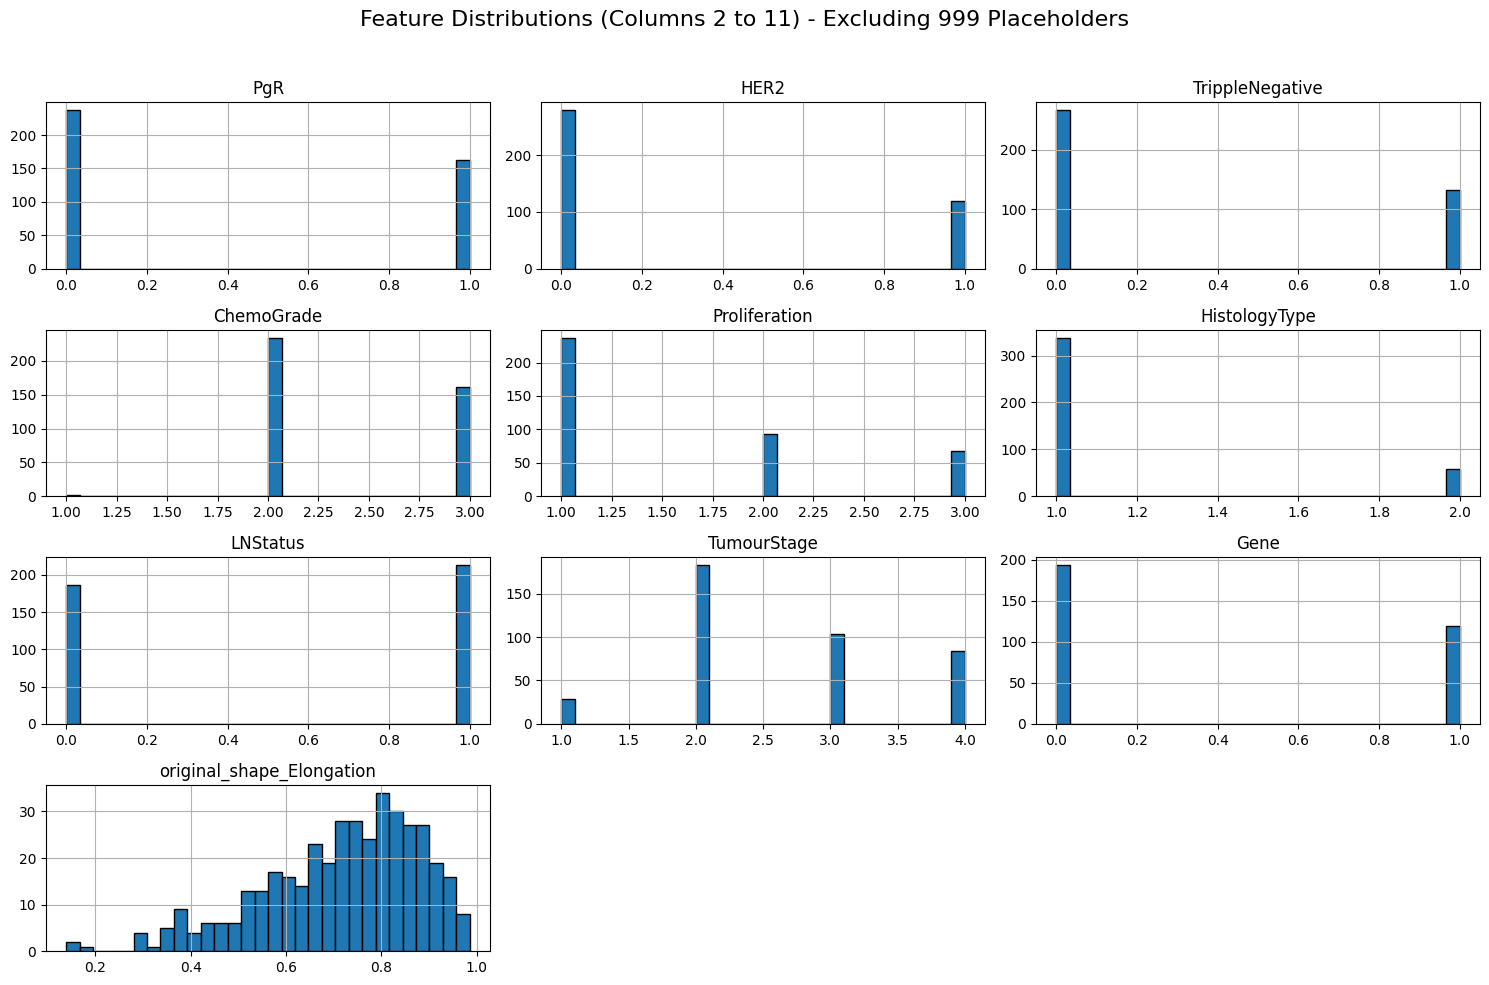

In [66]:
# Histogram for categorical data
# Replace placeholder values (999) with NaN to exclude them from the histogram
X_filtered_display = X_raw_cleaned.replace(999, np.nan)

# Specify the columns to plot
start_col = 1
end_col = 11

# Plot histograms, skipping the 999 placeholders
X_filtered_display.iloc[:, start_col:end_col].hist(bins=30, figsize=(15, 10), edgecolor='black')

# Add title
plt.suptitle(f"Feature Distributions (Columns {start_col + 1} to {end_col}) - Excluding 999 Placeholders", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Replace missing features "999" from:

[image.png] with mode (most frequent value).

In [67]:
X_filtered1 = X_raw_cleaned
for col in ['ER','PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus','TumourStage']:
    mode_value = X_raw_cleaned[col].mode()[0]
    X_filtered1[col] = X_raw_cleaned[col].replace(999, mode_value)


Replace missing features "999" from 'Gene' usin Random Forest Classifier to predict and input the missing values

In [68]:
# This is to save the genes classes in separate variable
known_genes = X_filtered1[X_filtered1['Gene'] != 999]
display(known_genes['Gene'].value_counts())

unknown_genes = X_filtered1[X_filtered1['Gene'] == 999]
display(unknown_genes['Gene'].value_counts())


,count
Gene,
0,193
1,119


,count
Gene,
999,88


In [69]:
X_filtered2 = X_filtered1

# Train a model to predict 'Gene' based on the other features

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(known_genes.drop('Gene', axis=1), known_genes['Gene'])

# Predict 'Gene' for the unknown genes
predicted_genes = model.predict(unknown_genes.drop('Gene', axis=1))
print(f'Prediction genes: {predicted_genes}')

Prediction genes: [1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [70]:
X_filtered = X_filtered1

# Replace with predicted gene
X_filtered.loc[unknown_genes.index, ['Gene']] = predicted_genes

zeros = X_filtered2[X_filtered2['Gene'] == 0]
ones = X_filtered2[X_filtered2['Gene'] == 1]

total_RFC_df = pd.concat([zeros, ones])
print(total_RFC_df['Gene'].value_counts())

Gene
0    258
1    142
Name: count, dtype: int64


In [71]:

# This is to save the genes classes in separate variable
known_genesAfter = X_filtered[X_filtered['Gene'] != 999]
display(known_genesAfter['Gene'].value_counts())

unknown_genesAfter = X_filtered[X_filtered['Gene'] == 999]
display(unknown_genesAfter['Gene'].value_counts())


,count
Gene,
0,258
1,142


,count
Gene,


TEST placeholders

In [72]:

Y_filtered = Y_raw_cleaned

# Check for placeholder values (999) in X_raw
placeholder_counts_X = pd.Series((X_filtered == 999).sum(), name='X_raw')

# Check for placeholder values (999) in Y_raw
placeholder_counts_Y = pd.Series((Y_filtered == 999).sum(), name='Y_raw')

# Combine the results into a single DataFrame for easier visualization
placeholder_counts = pd.concat([placeholder_counts_X, placeholder_counts_Y], axis=1)

# Filter columns with placeholder values only
placeholder_counts = placeholder_counts[(placeholder_counts > 0).any(axis=1)]

# Display results
if not placeholder_counts.empty:
    print("Columns with placeholder values (999):")
    print(placeholder_counts)
else:
    print("No placeholder values (999) found in the dataset.")

X_filtered
Y_filtered

No placeholder values (999) found in the dataset.


,RelapseFreeSurvival (outcome)
0,144.000000
1,142.000000
2,135.000000
3,12.000000
4,109.000000
...,...
395,54.500000
396,49.250000
397,48.500000
398,47.500000


**B. Addresing outliers**

Identifying outliers can be done using statistical and algorithmic approaches.

**C. One-Hot Encoding**

Convertes categories into binary columns.

# Dataset Splitting

**Split Data into Training, Validation, and Testing Sets**

# Training: Regression task models

Training Set: 70% of the original data (Xs_train and y_train)

Validation Set: 20% of the original data (Xs_val and y_val)

Testing Set: 20% of the original data (Xs_test and y_test)

***Models that require NORMALISATION***

**PCA requires normalisation**

Variance is scale-dependent.

**Linear Regression**

**Support Vector Machine**

**KNN**

**K-Means**

**Neural Network - Multilayer Perceptrons (MLP)**

***Models that NOT require NORMALISATION***

**Decision Tree Regresor**

**Random Forests**

# Models Evaluation

**Final evaluation on the test dataset**

Steps:
 Train on the full training set \
 Predict on the test set Xs_test \
 Evaluate using MSE : y_test and y_test_pred